In [1]:
from keras import layers, models, optimizers, metrics, losses
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [7]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result


In [20]:
train_labels[0]

3

In [8]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [14]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 276us/step - loss: 2.5239 - acc: 0.4959 - val_loss: 1.7193 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 165us/step - loss: 1.4447 - acc: 0.6897 - val_loss: 1.3461 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.0933 - acc: 0.7655 - val_loss: 1.1684 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8676 - acc: 0.8176 - val_loss: 1.0815 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.7009 - acc: 0.8488 - val_loss: 0.9829 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.5646 - acc: 0.8800 - val_loss: 0.9392 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.4577 - acc: 0.9057 - val_loss: 0.9099 - val_acc: 0.8040


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

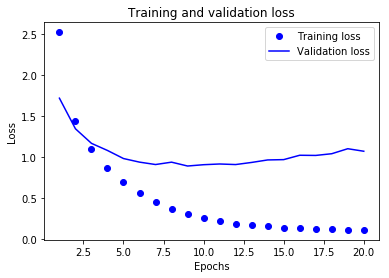

In [17]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

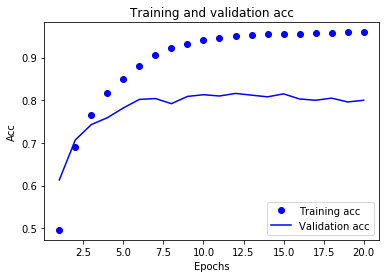

In [18]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [19]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 174us/step


[1.2139269719671588, 0.7791629564199507]

In [21]:
# What would be the performance on a totally random classifier?
# It is often desired to construct the most naive baseline for model comparison
# Here we get 19% accuracy from random classification

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)/len(test_labels))

0.1834372217275156

In [22]:
# Production use: 46 classes estimated for each sample
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [41]:
# The total multiclass predictins add up to unity (as expected for probabilities)
np.sum(predictions[0])

1.0000002

In [42]:
# The most likely class of the first message: 3
np.argmax(predictions[0])

3